# Αυτο-οργανούμενοι Χάρτες

Στο notebook αυτό θα χρησιμοποιήσουμε τη βιβλιοθήκη [Somoclu](https://somoclu.readthedocs.io/en/stable/index.html). Πρόκειται για μια σύγχρονη και βελτιστοποιημένη υλοποίηση των SOM, παραλληλοποιημένη για CPU και GPU. Πρώτα την εγκαθιστούμε:


In [1]:
!pip install --upgrade somoclu

     |████████████████████████████████| 6.2MB 9.5MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp36-cp36m-linux_x86_64.whl size=420984 sha256=34163eb1ee845bfe6c777a7e6b2292038ba3b4b18be5145f88b5df2654217e26
  Stored in directory: /root/.cache/pip/wheels/a6/e2/a0/4a61002b47e4965d7f59fd4c7ccf2e86a03ccad366f978d2a7
Successfully built somoclu


Επίσης, ενημερώνουμε στις τελευταίες εκδόσεις τους, τις υπόλοιπες βιβλιοθήκες που πρόκειται να χρησιμοποιοήσουμε

In [2]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade scikit-learn

     |████████████████████████████████| 1.5MB 8.1MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 14.5 MB 97 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.19.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 6.8 MB 8.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Εισαγωγή βιβλιοθηκών

Εισάγουμε numpy, matplotlib και mpl_toolkits, και somoclu:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline

## Δημιουργία και οπτικοποίηση δεδομένων

Δημιουργούμε 3 τεχνητές ομάδες τρισδιάστατων δεδομένων και εμφανίζουμε το γράφημα αναπαράστασής τους με διαφορετικό χρώμα για κάθε ομάδα:

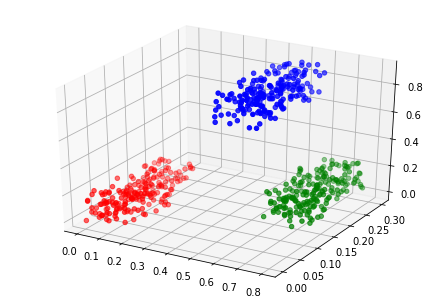

In [4]:
samples_in_each_class = 200
c1 = np.random.rand(samples_in_each_class, 3)/5
c2 = (0.6, 0.1, 0.05) + np.random.rand(samples_in_each_class, 3)/5
c3 = (0.4, 0.1, 0.7) + np.random.rand(samples_in_each_class, 3)/5
data = np.float32(np.concatenate((c1, c2, c3)))
colors = ["red"] * samples_in_each_class
colors.extend(["green"] * samples_in_each_class)
colors.extend(["blue"] * samples_in_each_class)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
labels = range(3*samples_in_each_class)

## Αρχικοποίηση και εκπαίδευση του SOM
Στη συνέχεια αρχικοποιούμε ένα χάρτη SOM με 10 x 10 νευρώνες και τον εκπαιδεύουμε με default παραμέτρους. Χρησιμοποιούμε τη magic `time` για να πάρουμε το χρόνο εκπαίδευσης.

In [5]:
n_rows, n_columns = 10, 10
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(data)

CPU times: user 71.4 ms, sys: 0 ns, total: 71.4 ms
Wall time: 48.3 ms


Δείτε [εδώ](https://somoclu.readthedocs.io/en/stable/reference.html) όλο το function reference της βιβλιοθήκης.

## Απεικόνιση SOM

Η βιβλιοθήκη προσφέρει διάφορες δυνατότητες απεικόνισης του χάρτη.

### Επίπεδα συνιστωσών

H πρώτη είναι να δούμε τα επίπεδα συνιστωσών (component planes), ως προς τους (τρεις) άξονες των διαστάσεων εισόδου. To colorbar μας δείχνει ποιοι νευρώνες του codebook (δηλαδή των 10x10 νευρώνων εξόδου) είναι κοντά. Θυμόμαστε ότι οι νευρώνες εξόδου βρίσκονται σε χώρο ίδιων διαστάσεων με τα διανύσματα εισόδου. Τα 3 γραφήματα είναι για x, y και z.

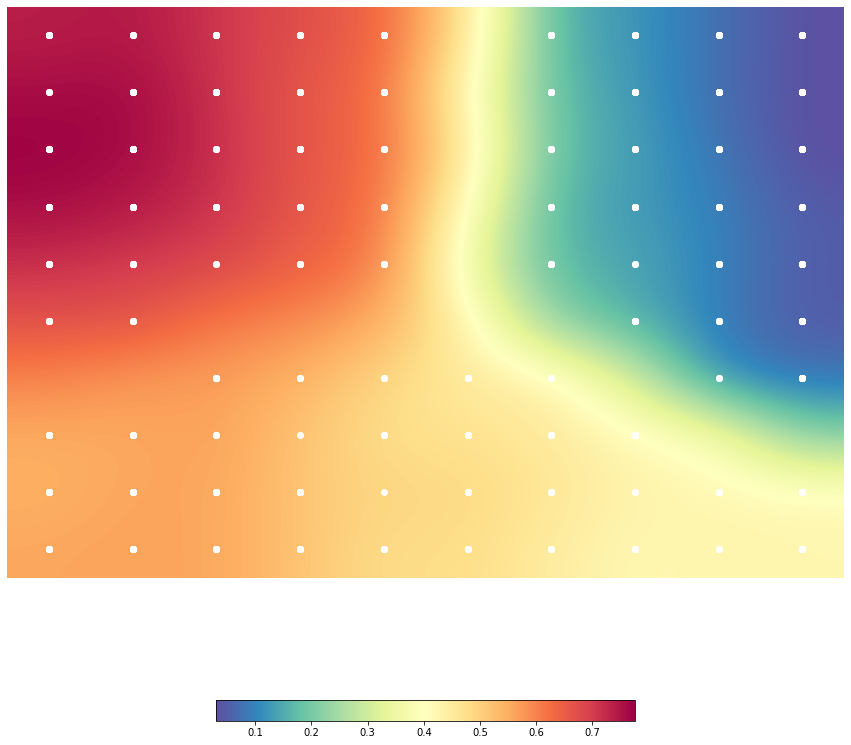

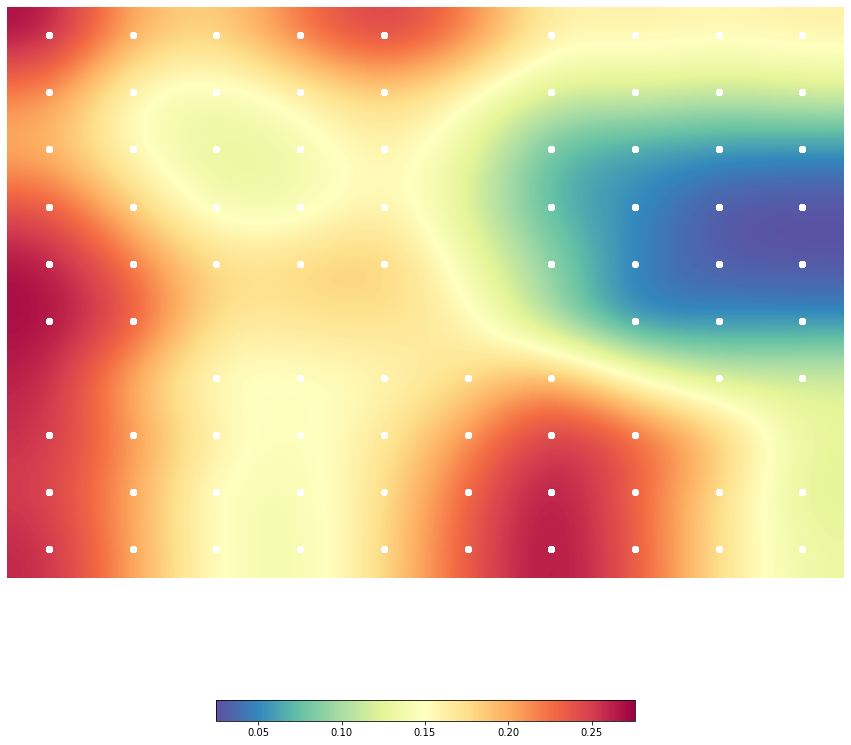

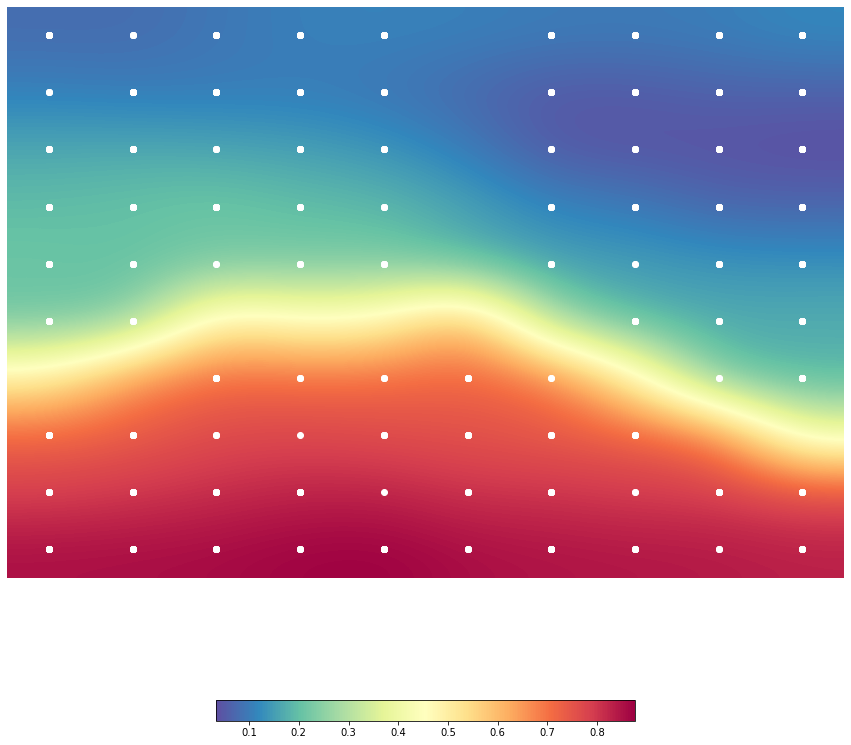

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [6]:
som.view_component_planes(colorbar=True, bestmatches=True, figsize=(15, 15))

Η figsize ελέγχει τις διαστάσεις του γραφήματος (zoom), όχι τις διαστάσεις του grid.

Η απεικόνιση με επίπεδα συνιστωσών είναι πολύ αναλυτική αλλά ίσως πολύ αναλυτική για να μας βοηθήσει στην ομαδοποίηση.

### U-matrix

Στην πράξη χρησιμοποιούμε το U-matrix που μας δείχνει το πλέγμα του SOM και το χρωματίζει ανάλογα το πόσο απέχουν οι νευρώνες εξόδου μεταξύ τους (όπως είδαμε στο μάθημα και σύμφωνα με το colorbar)

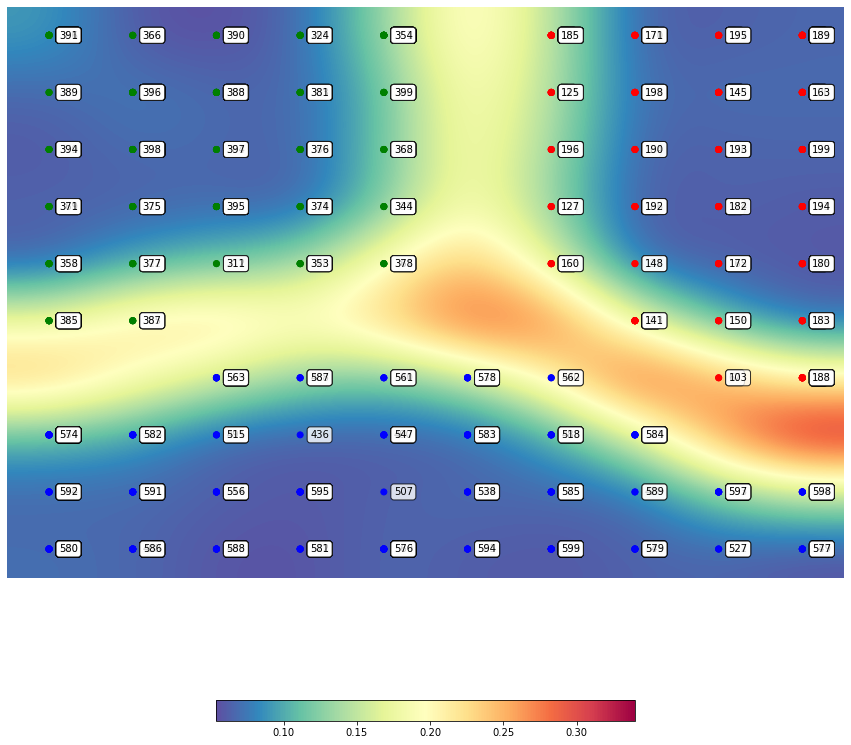

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [7]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels, colorbar=True, figsize=(15, 15))

## Παρατηρήσεις για την απεικόνιση U-matrix

- με `bestmatches=True` και `labels=labels` τυπώνουμε τα labels των δειγμάτων εισόδου που ανήκουν σε κάθε νευρώνα νικήτη (best matching unit - bmu). Προσοχή εδώ, στο local install του Somoclu ο χάρτης είναι διαδραστικός, στο notebook οχι. Προφανώς δεν ανήκει μόνο ένα δείγμα εισόδου σε κάθε bmu όπως φαίνεται εδώ αφου έχουμε 100 bmus και samples_in_each_class x 3 δείγματα εισόδου (πχ  600 για samples_in_each_class=200). Ο λόγος που εμφανίζεται έτσι είναι γιατί εμφανίζεται μόνο η ετικέτα του τελευταίου δείγματος που ανατίθεται στο κάθε bmu (φανταστείτε δηλαδή ότι κάτω από κάθε ετικέτα συνήθως υπάρχουν και άλλες).
- Οι κόκκινες περιοχές δείχνουν περιοχές με μεγάλες αποστάσεις και οι μπλε περιοχές δείχνουν περιοχές με μικρές αποστάσεις. Εποπτικά, βλέπουμε ότι έχει διαχωρίσει καλά σε τρία clusters τα δείγματα εισόδου. 

## Clustering των νευρώνων νικητών (bmus)
Η `bestmatchcolors=colors` βάζει χρώμα στα bmu που ανήκουν στο ίδιο cluster. Αυτό δεν γίνεται εποπτικά ("με το μάτι" από το U-matrix) αλλά ως εξής σε τρια βήματα:  
1. μέσω ανταγωνιστικής μάθησης έχουμε μάθει τα βάρη των νευρώνων νικητών (bmus). 
2. εφαρμόζουμε έναν αλγόριθμο συσταδοποίησης όπως k-means για βρούμε ποιοι νευρώνες νικητές ανήκουν στο ίδιο cluster
3. χρωματίζουμε με το ίδιο χρώμα τους νευρώνες κάθε cluster

Μπορούμε να ορίσουμε όποιον αλγόριθμο συσταδοποίησης θέλουμε για τα bmus του SOM:
```python
from sklearn.cluster import KMeans
algorithm = KMeans()
som.cluster(algorithm=algorithm)
```

### Best matching units (BMUS)

Μπορούμε να δούμε σε ποιο νευρώνα νικητή ανήκει κάθε δείγμα εισόδου ως εξής:

In [8]:
bmus = som.bmus

In [9]:
print(bmus.shape)

(600, 2)


οι διαστάσεις είναι τα διανύσματα εισόδου επί τις διαστάσεις του πλέγματός μας (2 εφόσον είναι 10x10). Ο πίνακας bmus μας δείχνει τις συντεταγμένες στο πλέγμα του νευρώνα νικητή στον οποίο ανήκει το κάθε δείγμα εισόδου.

In [10]:
print(bmus)

[[9 2]
 [9 5]
 [9 1]
 ...
 [8 8]
 [9 8]
 [6 9]]


**Προσοχή**
- η σύμβαση του Somoclu είναι \[κολόνα γραμμή\] (ανάποδα από την Python)
- αν πάρετε τις μοναδικές εμφανίσεις των bmus μπορεί να είναι λιγότερες από 100 (10x10). Αυτό γιατί μπορεί να υπάρξουν νευρώνες εξόδου που δεν νίκησαν ποτέ και δεν τους έχουν ανατεθεί δείγματα εδώ.

Μπορούμε να απαριθμήσουμε τα μοναδικά bmus και να πάρουμε άνα πίνακα που μας δείχνει σε ποιο αριθμό bmu ανήκει κάθε δείγμα εισόδου ως εξής:

In [11]:
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
# το return_inverse επιστρέφει και τους δείκτες indices

Τυπώνουμε τα μοναδικά bmus. Το \[0 0\] είναι το bmu 0, το \[0 1\] είναι το bmu 1, το \[0 2\] είναι το bmu 2  κοκ. 

In [12]:
print(ubmus)

[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 5]
 [0 7]
 [0 8]
 [0 9]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [1 7]
 [1 8]
 [1 9]
 [2 0]
 [2 1]
 [2 2]
 [2 3]
 [2 4]
 [2 6]
 [2 7]
 [2 8]
 [2 9]
 [3 0]
 [3 1]
 [3 2]
 [3 3]
 [3 4]
 [3 6]
 [3 7]
 [3 8]
 [3 9]
 [4 0]
 [4 1]
 [4 2]
 [4 3]
 [4 4]
 [4 6]
 [4 7]
 [4 8]
 [4 9]
 [5 6]
 [5 7]
 [5 8]
 [5 9]
 [6 0]
 [6 1]
 [6 2]
 [6 3]
 [6 4]
 [6 6]
 [6 7]
 [6 8]
 [6 9]
 [7 0]
 [7 1]
 [7 2]
 [7 3]
 [7 4]
 [7 5]
 [7 7]
 [7 8]
 [7 9]
 [8 0]
 [8 1]
 [8 2]
 [8 3]
 [8 4]
 [8 5]
 [8 6]
 [8 8]
 [8 9]
 [9 0]
 [9 1]
 [9 2]
 [9 3]
 [9 4]
 [9 5]
 [9 6]
 [9 8]
 [9 9]]


Τυπώνουμε τέλος για κάθε δείγμα εισόδου σε ποιο αριθμό bmu ανήκει. (πιο βολικό από τις συντεταγμένες των bmus)

In [13]:
print(indices)

[78 81 77 67 50 77 49 63 76 70 77 49 80 76 77 63 63 68 76 76 82 67 61 78
 53 68 68 53 76 77 68 77 82 60 78 77 50 80 70 61 70 76 80 52 67 77 68 82
 79 49 49 69 80 68 68 70 50 52 81 78 50 63 59 79 68 53 81 73 72 58 67 61
 49 50 59 63 53 67 68 69 77 81 76 52 82 70 69 58 60 63 76 76 70 60 68 58
 61 78 77 49 76 50 76 73 76 81 82 72 77 49 68 50 71 80 81 51 82 49 72 71
 51 52 68 63 82 50 79 52 58 79 77 62 59 49 59 78 49 59 49 72 80 63 58 68
 71 68 58 71 62 49 72 80 51 61 76 81 53 69 82 59 53 79 67 77 79 71 49 69
 78 76 58 58 71 79 70 80 69 67 76 78 80 76 70 81 60 49 61 82 82 76 60 59
 61 69 79 67 51 78 59 78 30  3  3 14  2 39 38 19  5 38 19 36 22 36 18 12
 30 10  9 11  4  0 29 27 10 10  0 11 36 19  4 37 29 10 36  4 27 29 36 37
 38 28 18 40 10 18 27 11 11 27 11  0 37 21  1 36  4  0 21 12 19  9 13 18
  4 28 21 19  0 28 20 14 10 38 36 11 31  2 20 18  0 40  3 10 10 27 12  5
 13 21 30 13  0 19 10 27 28  4  3 21 12  3 21 12 31  2 36 13 29  0  2 22
 36 31 18 28 36  5  0 30 21 12 13  5 27 12 36 39 31